Task:
What are the demanded skills for the top 3 most popular data roles?



In [56]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df.job_posted_date)
df["job_skills"]=df["job_skills"].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [57]:
df_US=df[df['job_country']=='United States']

In [58]:
df_skills=df_US.explode('job_skills')

In [59]:
df_skills_count=df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skills_count')
df_skills_count=df_skills_count.sort_values(by='skills_count', ascending=False)
print(df_skills_count)

     job_skills            job_title_short  skills_count
1209     python             Data Scientist         42379
1521        sql               Data Analyst         34452
1523        sql             Data Scientist         30034
455       excel               Data Analyst         27519
1243          r             Data Scientist         26022
...         ...                        ...           ...
1785     vue.js           Business Analyst             1
60         arch           Business Analyst             1
71        asana  Machine Learning Engineer             1
968      no-sql  Machine Learning Engineer             1
1861       zoom             Cloud Engineer             1

[1870 rows x 3 columns]


In [60]:
job_list=df_skills_count['job_title_short'].unique().tolist()
job_list=sorted(job_list[:3])
job_list

['Data Analyst', 'Data Engineer', 'Data Scientist']

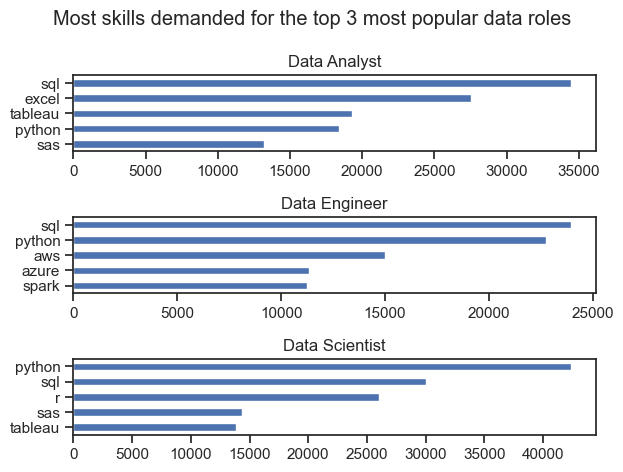

In [61]:
fig,ax=plt.subplots(len(job_list), 1)
for i, j_title in enumerate(job_list):
    plott=df_skills_count[df_skills_count['job_title_short']==j_title].head(5)
    plott.plot(kind='barh', x='job_skills', y='skills_count',ax=ax[i],title=j_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle("Most skills demanded for the top 3 most popular data roles")
fig.tight_layout()
plt.show()

In [62]:
df_total_jobs=df_US['job_title_short'].value_counts().reset_index(name='job counts')
df_total_jobs

,job_title_short,job counts
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [63]:
df_percent=pd.merge(df_skills_count, df_total_jobs, how='left', on='job_title_short')
df_percent['perc']=100*df_percent['skills_count']/df_percent['job counts']
df_percent

,job_skills,job_title_short,skills_count,job counts,perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


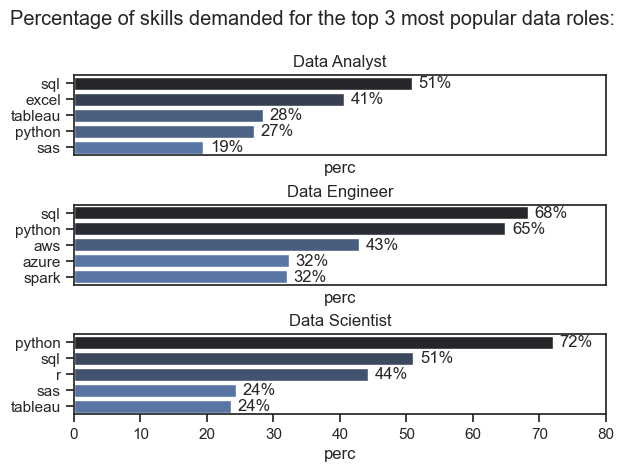

In [86]:
fig,ax=plt.subplots(len(job_list), 1)
sns.set_theme(style='ticks')
for i, j_title in enumerate(job_list):
    plott=df_percent[df_percent['job_title_short']==j_title].head(5)
    sns.barplot(data=plott, x='perc', y='job_skills',ax=ax[i], hue='skills_count', palette='dark:b_r')
    ax[i].set_title(j_title)
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,80)
    ax[i].legend().set_visible(False)
    
    for index, value in enumerate(plott['perc']):
        ax[i].text(value+1, index,f'{value:.0f}%', va='center')

    if i !=len(job_list)-1:     
     ax[i].set_xticks([])
fig.suptitle("Percentage of skills demanded for the top 3 most popular data roles:")
fig.tight_layout(h_pad=0.5)
plt.show()